Code qui affiche la distribution des durées de trajet.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Chargement des données
data = pd.read_csv('/home/onyxia/Projet_statapp/data/EMP_deplacements_Charme.csv', sep=';', encoding='ISO-8859-1')
data['HEURE_DEPART'] = data['HEURE_DEPART'].str.replace(',', '.').astype(float)
data['HEURE_ARRIVEE'] = data['HEURE_ARRIVEE'].str.replace(',', '.').astype(float)
data['POND_JOUR'] = data['POND_JOUR'].str.replace(',', '.').astype(float)

# Calcul de la durée des trajets et ajustement pour les valeurs négatives
data['DUREE_TRAJET'] = data['HEURE_ARRIVEE'] - data['HEURE_DEPART']
data['DUREE_TRAJET'] = data['DUREE_TRAJET'].apply(lambda x: x if x >= 0 else (23 + (59/60)) - data['HEURE_DEPART'])




In [5]:
data['DUREE_TRAJET'].sort_values().head(5)

11293    0.000000
20444    0.000000
3255     0.000000
12724    0.016667
9027     0.016667
Name: DUREE_TRAJET, dtype: float64

In [8]:
data['DUREE_TRAJET'].sort_values(ascending=False).head(50)

5207     8.333333
21632    3.750000
20150    3.166667
15499    3.066667
22403    3.000000
3194     3.000000
17305    3.000000
3777     3.000000
2551     3.000000
3914     3.000000
4602     3.000000
22383    3.000000
18226    2.900000
17621    2.833333
4887     2.750000
16582    2.716667
16581    2.700000
8364     2.666667
1559     2.666667
22506    2.666667
3936     2.666667
14285    2.500000
21342    2.500000
1810     2.500000
6338     2.500000
19290    2.500000
764      2.500000
8535     2.500000
13973    2.500000
4505     2.500000
16851    2.416667
17823    2.416667
17545    2.333333
4506     2.333333
13166    2.333333
10399    2.250000
2001     2.250000
5094     2.250000
17401    2.250000
195      2.250000
41       2.166667
7654     2.166667
15085    2.166667
17060    2.050000
6291     2.000000
3441     2.000000
17078    2.000000
1908     2.000000
1859     2.000000
1809     2.000000
Name: DUREE_TRAJET, dtype: float64

In [20]:
data.shape

(22526, 25)

In [22]:
# Filtrage pour les trajets de moins de 4 heures
data = data[data['DUREE_TRAJET'] < 4]
data.shape

(22525, 25)

In [23]:
data['DUREE_TRAJET'].describe()

count    22525.000000
mean         0.313535
std          0.285847
min          0.000000
25%          0.166667
50%          0.250000
75%          0.416667
max          3.750000
Name: DUREE_TRAJET, dtype: float64

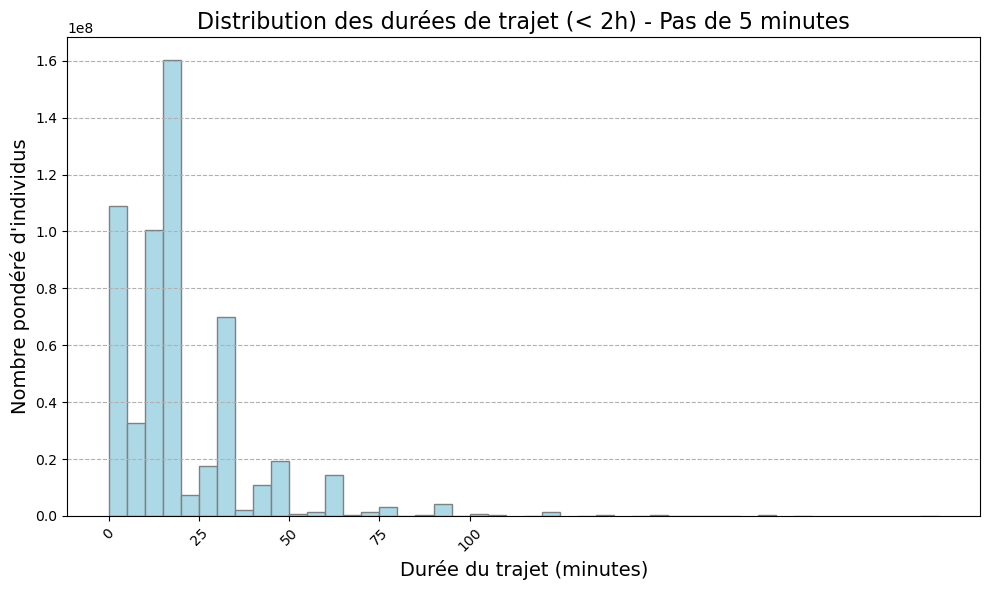

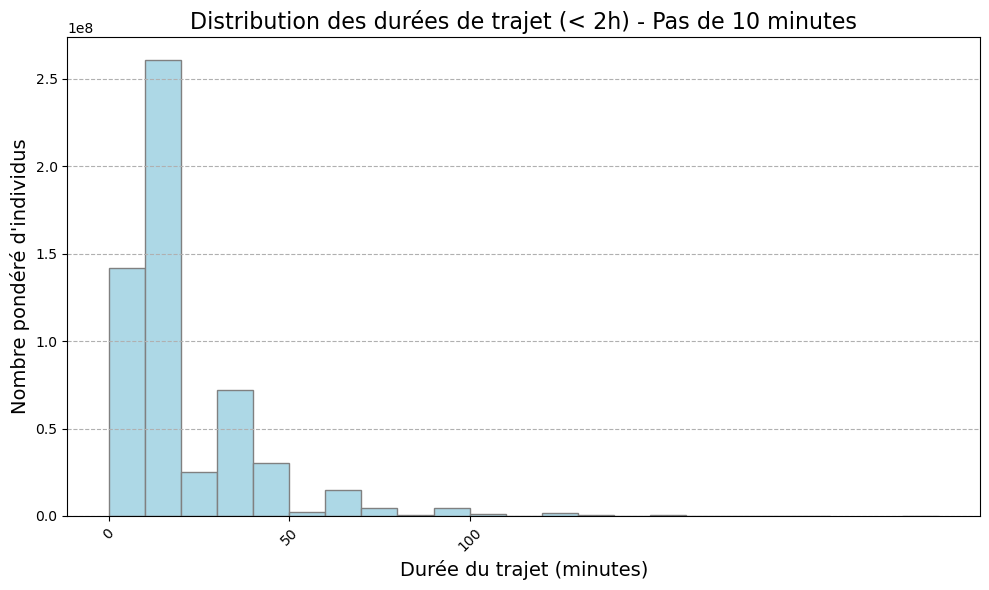

In [24]:

# Fonction pour créer et afficher les graphiques
def afficher_graphiques(data, pas):
    for granularity in pas:
        # Préparation des données pour le graphique
        df = data.copy()
        df['DUREE_MINUTES'] = (np.floor(df['DUREE_TRAJET'] * (60 / granularity)) * granularity).astype(int)
        grouped_data = df.groupby('DUREE_MINUTES')['POND_JOUR'].sum().reset_index()
        
        # Ajustement de la taille de la figure et création du graphique
        plt.figure(figsize=(10, 6))  # Taille ajustée pour éviter l'erreur de taille d'image
        plt.bar(grouped_data['DUREE_MINUTES'], grouped_data['POND_JOUR'], width=granularity, color='lightblue', edgecolor='grey', align='edge')
        
        plt.title(f'Distribution des durées de trajet (< 2h) - Pas de {granularity} minutes', fontsize=16)
        plt.xlabel('Durée du trajet (minutes)', fontsize=14)
        plt.ylabel('Nombre pondéré d\'individus', fontsize=14)
        
        # Simplification des étiquettes de l'axe des x pour éviter l'erreur de taille d'image
        plt.xticks(range(0, 120, granularity * 5), rotation=45)
        
        plt.grid(axis='y', linestyle='--')
        plt.tight_layout()  # Ajustement de la disposition
        plt.show()

# Affichage des graphiques pour les pas de 5 et 10 minutes
afficher_graphiques(data, [5, 10])

### Distribution en fonction du jour de la semaine :

In [37]:
data['DUREE_TRAJET'] = data['DUREE_TRAJET'].replace(',', '.').astype(float)
data['DUREE_TRAJET'] = data['DUREE_TRAJET'] * 60

In [42]:
# Filtrage semaine / week-end :
data_weekend = data[data['TYPE_jour'].isin(['samedi','dimanche'])]
data_semaine = data[data['TYPE_jour'].isin(['samedi','dimanche']) == False]

In [46]:
# Pour avoir les graphs de même échelle

bins = range(0, int(max(data_weekend['DUREE_TRAJET'].max(), data_semaine['DUREE_TRAJET'].max())) + 10, 10)
max_weight = 0
for df in [data_weekend, data_semaine]:
    hist, _ = np.histogram(df['DUREE_TRAJET'], bins=bins, weights=df['POND_JOUR'])
    max_weight = max(max_weight, hist.max())

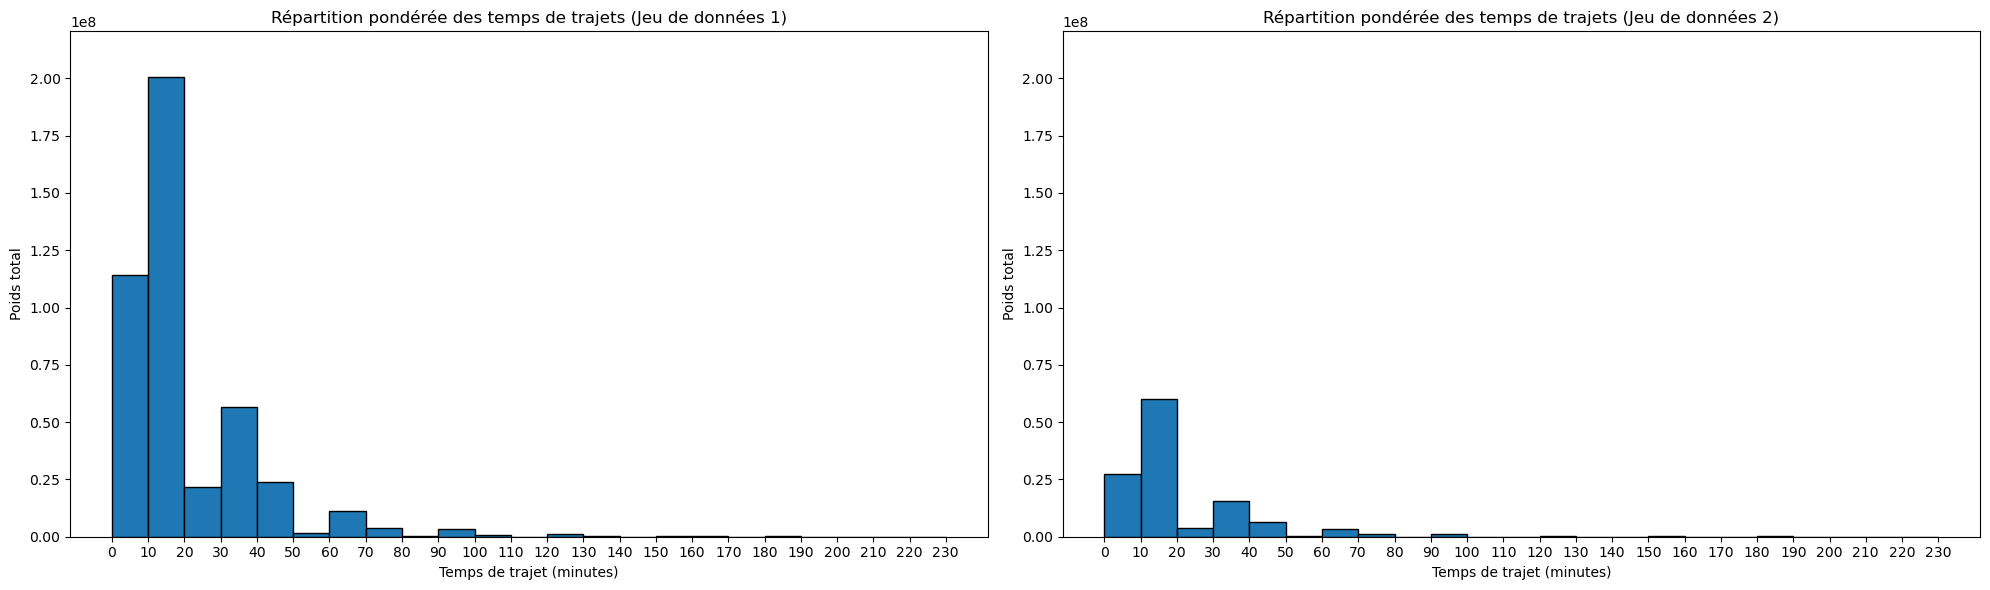

In [47]:
plt.figure(figsize=(20, 6))

for i, df in enumerate([data_semaine, data_weekend], 1):
    plt.subplot(1, 2, i)
    plt.hist(df['DUREE_TRAJET'], weights=df['POND_JOUR'], bins=bins, edgecolor='black')
    plt.title(f'Répartition pondérée des temps de trajets (Jeu de données {i})')
    plt.xlabel('Temps de trajet (minutes)')
    plt.ylabel('Poids total')
    plt.xticks(bins)
    plt.ylim(0, max_weight * 1.1)  # Utilise le poids total maximum avec une petite marge

plt.tight_layout()
plt.show()

In [48]:
pip install fitter


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.6/240.6 kB 33.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.5/87.5 kB 33.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [49]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from fitter import Fitter

/tmp/ipykernel_76023/1384224687.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_semaine['DUREE_TRAJET'] = pd.to_numeric(data_semaine['DUREE_TRAJET'], errors='coerce')


Meilleure distribution : lognorm
Paramètres : (0.7721571007831636, -0.45933070372289697, 14.27673478598268)


AttributeError: 'str' object has no attribute 'pdf'

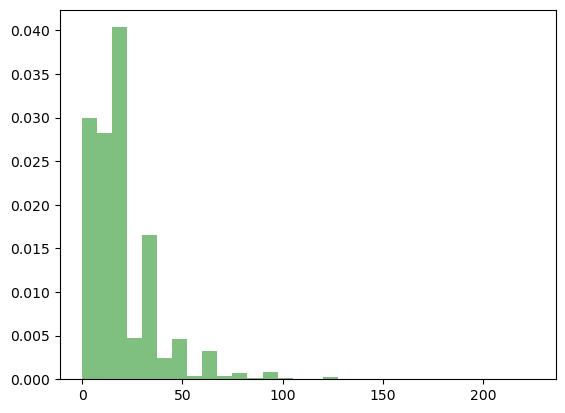

In [53]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

# Supposons que data_semaine est déjà chargé et prêt
data_semaine['DUREE_TRAJET'] = pd.to_numeric(data_semaine['DUREE_TRAJET'], errors='coerce')

# Sélection de quelques distributions à tester
distributions = [stats.norm, stats.lognorm, stats.expon]
results = []

# Ajustement des distributions et calcul de l'AIC pour chaque distribution
for distribution in distributions:
    # Ajustement de la distribution
    params = distribution.fit(data_semaine['DUREE_TRAJET'])
    
    # Calcul de l'AIC
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]
    aic = 2 * len(params) - 2 * np.sum(np.log(distribution.pdf(data_semaine['DUREE_TRAJET'], *arg, loc=loc, scale=scale)))
    results.append((distribution.name, params, aic))

# Sélection de la distribution avec le plus petit AIC
best_fit = sorted(results, key=lambda x: x[2])[0]
print(f"Meilleure distribution : {best_fit[0]}")
print(f"Paramètres : {best_fit[1]}")

# Affichage de la distribution sélectionnée par rapport aux données empiriques
plt.hist(data_semaine['DUREE_TRAJET'], bins=30, density=True, alpha=0.5, color='g', label='Données empiriques')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
y = best_fit[0].pdf(x, *best_fit[1][:-2], loc=best_fit[1][-2], scale=best_fit[1][-1])
plt.plot(x, y, 'k', linewidth=2, label='Meilleure ajustement')
plt.legend()

plt.show()


### Distribution en fonction de la plage horaire ;

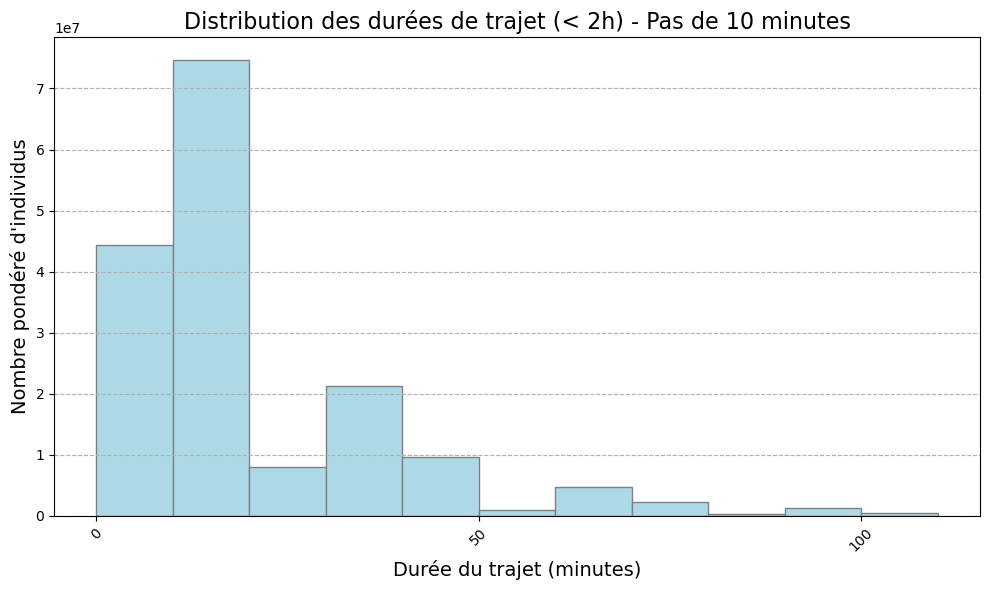

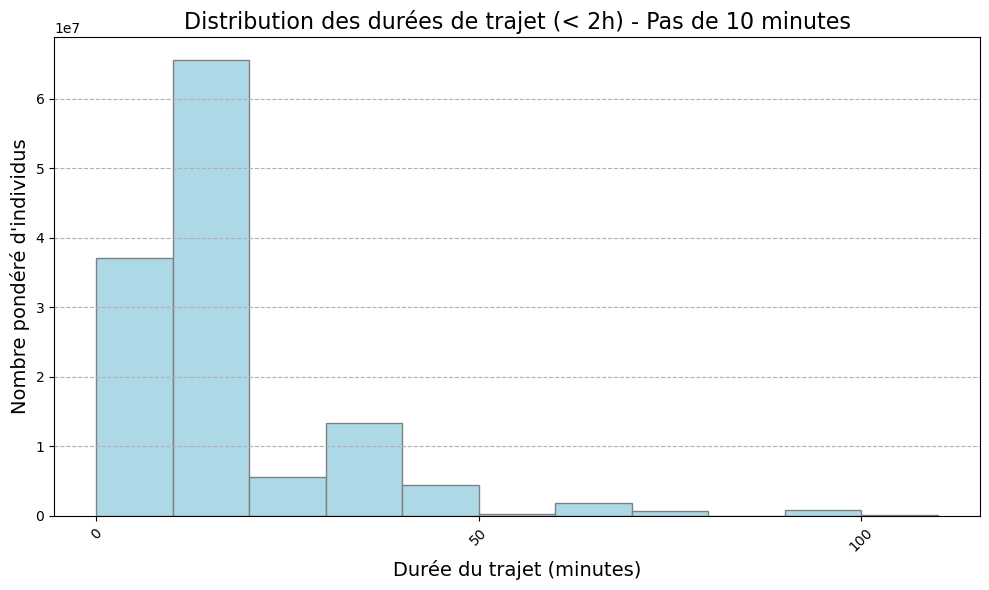

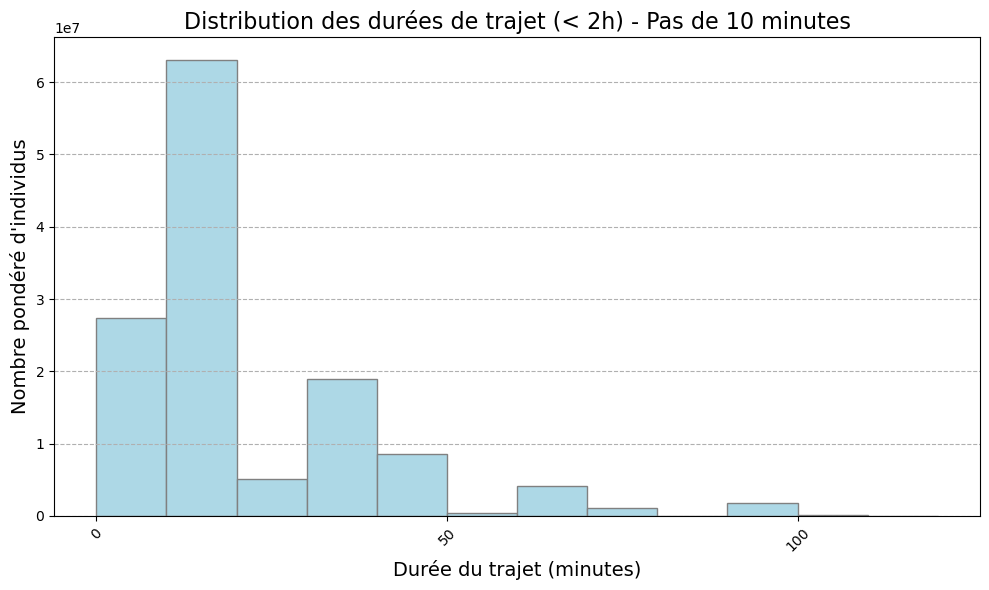

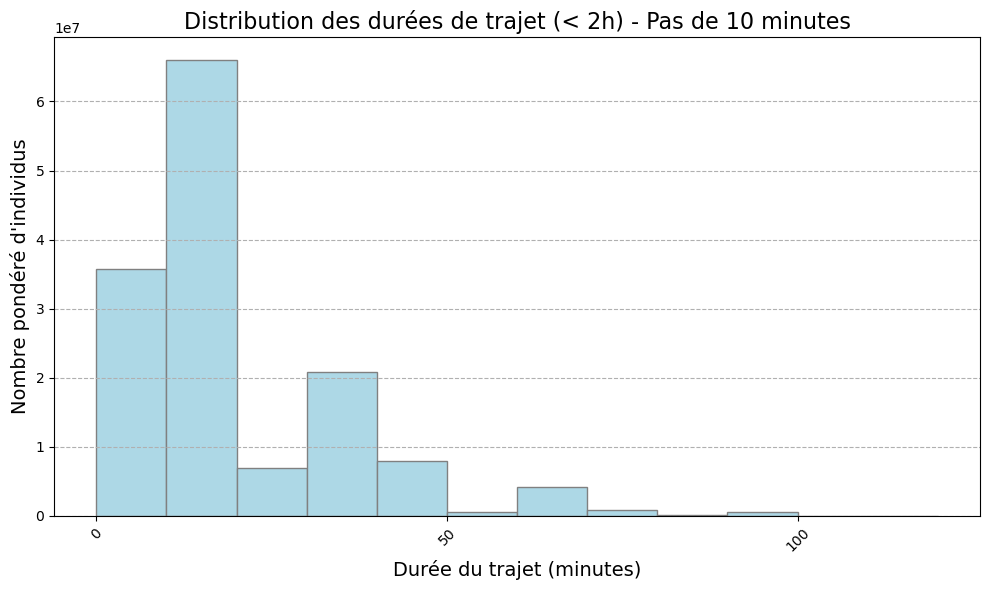

In [23]:
data_matin = data[data['HEURE_DEPART'] < 11]
data_11_14 = data[data['HEURE_DEPART'].between(11,14)]
data_14_17 = data[data['HEURE_DEPART'].between(14,17)]
data_soir = data[data['HEURE_DEPART'] > 17]


afficher_graphiques(data_matin, [10])
afficher_graphiques(data_11_14, [10])
afficher_graphiques(data_14_17, [10])
afficher_graphiques(data_soir, [10])



In [17]:
data_matin.shape

(14970, 25)

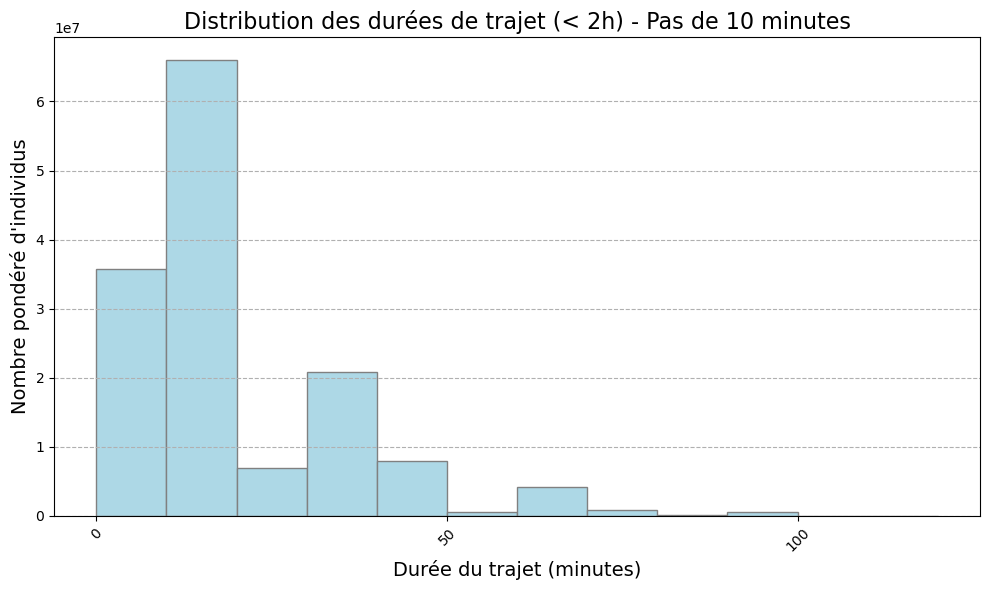

In [11]:
afficher_graphiques(data_soir, [10])